In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob 
import astropy as ap 
from astropy.io import fits
import dopp
from scipy.signal import argrelmax
from scipy import signal 


In [3]:
files635 = glob.glob('LO_635*.fits')
files636 = glob.glob('LO_636*.fits')
filesnoise_On = glob.glob('LO_(635*_ON*.fits')
filesnoise_off = glob.glob('LO_(635*_OFF*.fits')


In [4]:
def get_info(filename):
    x = fits.open(filename)
    res = x[0].header['RES']
    nchan = x[0].header['NCHAN']
    l = x[0].header['L']
    b = x[0].header['B']
    jd = x[0].header['JD']
    ra = x[0].header['RA']
    dec = x[0].header['DEC']
    spec = x[0].header['NSPEC']
    polar_1st = np.array([x[i+1].data['auto0_real'] for i in range(int(x[0].header['NSPEC']))])
    polar_2nd = np.array([x[i+1].data['auto1_real'] for i in range(int(x[0].header['NSPEC']))])

    avg1 = np.mean(polar_1st, axis = 0)
    avg2 = np.mean(polar_2nd, axis = 0)
    
    x.close()
    
    return res, nchan, l, b, jd, ra, dec, avg1, avg2

In [5]:
RES635 = []
NCHAN635 = []
L635 = []
B635 = []
POLAR1635 = []
POLAR2635 = []
JD635 = []
RA635 = []
DEC635 = []

for i in range(int(len(files635))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(files635[i])
    RES635.append(r)
    NCHAN635.append(ch)
    L635.append(l)
    B635.append(b)
    POLAR1635.append(av1)
    POLAR2635.append(av2)
    JD635.append(jd)
    RA635.append(ra)
    DEC635.append(dec)

In [6]:
RES636 = []
NCHAN636 = []
L636 = []
B636 = []
POLAR1636 = []
POLAR2636 = []
JD636 = []
RA636 = []
DEC636 = []

for i in range(int(len(files636))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(files636[i])
    RES636.append(r)
    NCHAN636.append(ch)
    L636.append(l)
    B636.append(b)
    POLAR1636.append(av1)
    POLAR2636.append(av2)
    JD636.append(jd)
    RA636.append(ra)
    DEC636.append(dec)

In [7]:
RESnoiseON = []
NCHANnoiseON = []
LnoiseON = []
BnoiseON = []
POLAR1noiseON = []
POLAR2noiseON = []
JDnoiseON = []
RAnoiseON = []
DECnoiseON = []

for i in range(int(len(filesnoise_On))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(filesnoise_On[i])
    RESnoiseON.append(r)
    NCHANnoiseON.append(ch)
    LnoiseON.append(l)
    BnoiseON.append(b)
    POLAR1noiseON.append(av1)
    POLAR2noiseON.append(av2)
    JDnoiseON.append(jd)
    RAnoiseON.append(ra)
    DECnoiseON.append(dec)

In [8]:
RESnoiseOFF = []
NCHANnoiseOFF = []
LnoiseOFF = []
BnoiseOFF = []
POLAR1noiseOFF = []
POLAR2noiseOFF = []
JDnoiseOFF = []
RAnoiseOFF = []
DECnoiseOFF = []

for i in range(int(len(filesnoise_off))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(filesnoise_off[i])
    RESnoiseOFF.append(r)
    NCHANnoiseOFF.append(ch)
    LnoiseOFF.append(l)
    BnoiseOFF.append(b)
    POLAR1noiseOFF.append(av1)
    POLAR2noiseOFF.append(av2)
    JDnoiseOFF.append(jd)
    RAnoiseOFF.append(ra)
    DECnoiseOFF.append(dec)

In [9]:
v_corrected635 = []
for i in range(int(len(JD635))):
    v = dopp.get_projected_velocity(RA635[i],DEC635[i],JD635[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_corrected635.append(float(v/1000))

In [10]:
v_corrected636 = []
for i in range(int(len(JD636))):
    v = dopp.get_projected_velocity(RA636[i],DEC636[i],JD636[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_corrected636.append(float(v/1000))

In [11]:
v_correctednoiseON = []
for i in range(int(len(JDnoiseON))):
    v = dopp.get_projected_velocity(RAnoiseON[i],DECnoiseON[i],JDnoiseON[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_correctednoiseON.append(float(v/1000))

In [12]:
v_correctednoiseOFF = []
for i in range(int(len(JDnoiseOFF))):
    v = dopp.get_projected_velocity(RAnoiseOFF[i],DECnoiseOFF[i],JDnoiseOFF[i],obs_lat=37.9183, obs_lon=-122.1067, 
        obs_alt=304, epoch=2451545.)
    v_correctednoiseOFF.append(float(v/1000))

In [13]:
from astropy import units as u
FREQS635 = []
for i in range(int(len(RES635))):
    freqs = (np.arange(NCHAN635[i]) * RES635[i]*u.Hz + 2 * 635 * u.MHz + 144 * u.MHz).to(u.MHz).value
    FREQS635.append(freqs)

In [14]:
FREQS636 = []
for i in range(int(len(RES636))):
    freqs = (np.arange(NCHAN636[i]) * RES636[i]*u.Hz + 2 * 635 * u.MHz + 144 * u.MHz).to(u.MHz).value
    FREQS636.append(freqs)

In [15]:
FREQSnoiseON = []
for i in range(int(len(RESnoiseON))):
    freqs = (np.arange(NCHANnoiseON[i]) * RESnoiseON[i]*u.Hz + 2 * 635 * u.MHz + 144 * u.MHz).to(u.MHz).value
    FREQSnoiseON.append(freqs)

In [16]:
FREQSnoiseOFF = []
for i in range(int(len(RESnoiseOFF))):
    freqs = (np.arange(NCHANnoiseOFF[i]) * RESnoiseOFF[i]*u.Hz + 2 * 635 * u.MHz + 144 * u.MHz).to(u.MHz).value
    FREQSnoiseOFF.append(freqs)

In [17]:
c = 3e8
f0 = 1420.4
dopp_vel636 = []
for i in range(int(len(FREQS636))):
    v = -((c*(FREQS636[i]-f0))/f0)/1000 
    dopp_vel636.append(v)

In [18]:
dopp_vel635 = []
for i in range(int(len(FREQS635))):
    v = -((c*(FREQS635[i]-f0))/f0)/1000 
    dopp_vel635.append(v)

In [19]:
dopp_velnoiseON = []
for i in range(int(len(FREQSnoiseON))):
    v = -((c*(FREQSnoiseON[i]-f0))/f0)/1000 
    dopp_velnoiseON.append(v)

In [20]:
dopp_velnoiseOFF = []
for i in range(int(len(FREQSnoiseOFF))):
    v = -((c*(FREQSnoiseOFF[i]-f0))/f0)/1000 
    dopp_velnoiseOFF.append(v)

In [21]:
Vel635 = []
for i in range(int(len(dopp_vel635))):
    v = dopp_vel635[i] - v_corrected635[i]
    Vel635.append(v)

In [22]:
Vel636 = []
for i in range(int(len(dopp_vel636))):
    v = dopp_vel636[i] - v_corrected636[i]
    Vel636.append(v)

In [23]:
VelnoiseON = []
for i in range(int(len(dopp_velnoiseON))):
    v = dopp_velnoiseON[i] - v_correctednoiseON[i]
    VelnoiseON.append(v)

In [24]:
VelnoiseOFF = []
for i in range(int(len(dopp_velnoiseOFF))):
    v = dopp_velnoiseOFF[i] - v_correctednoiseOFF[i]
    VelnoiseOFF.append(v)

In [25]:
L = np.concatenate([LnoiseON,L635])
B = np.concatenate([BnoiseON,B635])


In [50]:
 yee = FREQS635[0][4100:4600]


In [26]:
Peaks_power = []
peaks_index = []

for k in range(int(len(files635))):
    n = 16

   ## PART 1 of chuncking 
    data635 = POLAR1635[k]
    freqs635 = FREQS635[k]
    MODEL635 = []
    for i in range(n):
        n = float(n)
        freq = freqs635[i*(int(len(data635)/n)):(i+1)*(int(len(data635)/n))]
        dat = data635[i*(int(len(data635)/n)):(i+1)*(int(len(data635)/n))]
        coef = np.polyfit(freq,dat,2)
        term = [coef[i]*freq**((int(len(coef))-1)-i) for i in range(int(len(coef)))]
        model = np.sum([term[i] for i in range(int(len(term)))],axis =0)
        MODEL635.append(model)
    MODEL5 = np.concatenate([MODEL635[i] for i in range(int(len(MODEL635)))])
    
    data636 = POLAR1636[k]
    freqs636 = FREQS636[k]
    MODEL636 = []
    n = int(n)
    for i in range(n):
        n = float(n)
        freq = freqs636[i*(int(len(data636)/n)):(i+1)*(int(len(data636)/n))]
        dat = data636[i*(int(len(data636)/n)):(i+1)*(int(len(data636)/n))]
        coef = np.polyfit(freq,dat,2)
        term = [coef[i]*freq**((int(len(coef))-1)-i) for i in range(int(len(coef)))]
        model = np.sum([term[i] for i in range(int(len(term)))],axis =0)
        MODEL636.append(model)
    MODEL6 = np.concatenate([MODEL636[i] for i in range(int(len(MODEL636)))])
        
    yee = data635 - MODEL5
    yit = data636 - MODEL6
    peakind = signal.find_peaks_cwt(yee[4100:4600], np.arange(1,5))
    
    PEAK = []
    
    for index in peakind: 
        Pow = yee[4100:4600][index]
        if Pow == max(yee[4100:4600][peakind]):
            PEAK.append(index)
    
          


#     plt.figure(figsize=(10,5))
# #     plt.plot(FREQS635[k],data635)
# #     plt.plot(FREQS635[k],MODEL5)
#     plt.plot(FREQS635[k][4100:4600],yee[4100:4600])
#     plt.plot(FREQS635[k][4100:4600][PEAK],yee[4100:4600][PEAK],'o')
#     plt.title('Calibrated Power Spectra at L = {}, B = {}'.format(L[k],B[k]) ,fontsize = 20)
#     plt.xlabel('Frequency [MHz]',fontsize = 20)
#     plt.ylabel('Power [V$^2$]',fontsize =20)
    
    
#     plt.show()
    
    peaks_index.append(int(PEAK[0]) + 4100)
    
        
    

    
#     gg = yee[3500:5000] - yit[3500:5000]
#     peaks = np.array(argrelmax(gg,order=100))
#     ax= plt.figure().gca() 
#     ax.plot(gg,color='k')
#     ax.plot(peaks,gg[peaks],linestyle='none',marker='*',markersize=10,color='r')
#     ax.set_xlabel('index (zero-based)')
#     ax.set_ylabel('value') 

In [27]:
total_vel = []
for i in range(int(len(peaks_index))):
    v = Vel635[i][peaks_index[i]]
    total_vel.append(v)

In [28]:
np.savez('galactic_stuff',np.asarray(L635),np.asarray(B635),total_vel)

In [38]:
def plot_galactic_sphere(l,b,vel, org=0, projection='mollweide'):
    ''' l, b are arrays of the same length.
    l takes values in [0,360), b in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(l+360,360) # shift az values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]    
    tick_labels = np.array([210, 240, 270, 300, 330, 0, 30, 60, 90, 120, 150])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection=projection)
    coord = ax.scatter(np.radians(x),np.radians(b),c = vel,marker=',')  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title('North Polar Spur Observations ')
    ax.title.set_fontsize(15)
    ax.set_xlabel("Galactic Longitude [$\degree$]",fontsize = 30)
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Galactic Latitude [$\degree$]",fontsize=30)
    ax.yaxis.label.set_fontsize(12)
    cbar = plt.colorbar(coord)
    cbar.set_label('Corrected Velocities [km/s]',fontsize = 20)
   
    ax.grid(True)

In [39]:
total_vel635 = np.asarray(total_vel)

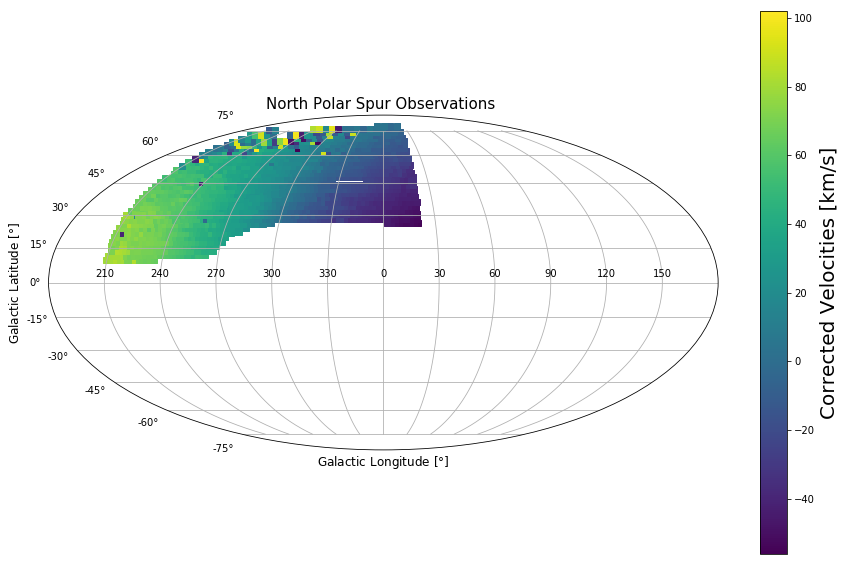

In [40]:
plot_galactic_sphere(np.asarray(L635),np.asarray(B635),total_vel635)